# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [68]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-06 01:16:12--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-06 01:16:12--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.2’

Gender_bias

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [69]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [71]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [72]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [73]:
# Resumen del conjunto de datos
data.shape
# Contar la cantidad de tweets por etiqueta
data.Label.value_counts()

,count
Label,
non-biased,1596
biased,318


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

El 83% de los tweets son non-biased y el 16% son biased. lo que quiere decir hay un desbalance ya que hay más mensajes sin sesgo que con sesgo. Estos datos nos indican que puede afectar los análisis porque es menos preciso al detectar tweets con sesgo si no se corrige esta desigualdad.  

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [74]:
## Cree una funcion limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)
    palabras = [palabra for palabra in texto.split() if palabra not in stop_words]
    return " ".join(palabras)

In [75]:

# Aplicar la limpieza de texto
data['clean_text'] = data['Contents'].apply(limpiar_texto)

In [76]:
data.head()


,Contents,Label,clean_text
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,chumeltorres cabrón tí reciben noticias colcho...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,jenniferduquee hahaha si rico nadamas falta pr...
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,evagelcot ves programa favorito sólo encuentro...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos playa http...


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [125]:
# Contar palabras
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras.split())
# Visualización de frecuencia de palabras

data['frecuencia'] = data['Contents'].apply(contar_palabras)

In [126]:
data.head()

,Contents,Label,clean_text,frecuencia
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,chumeltorres cabrón tí reciben noticias colcho...,"{'chumeltorres': 1, 'cabrón': 1, 'tí': 1, 'rec..."
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable ir hacerme compra mañana ba...,"{'alguien': 1, 'tan': 1, 'amable': 1, 'ir': 1,..."
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,jenniferduquee hahaha si rico nadamas falta pr...,"{'jenniferduquee': 1, 'hahaha': 1, 'si': 1, 'r..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,evagelcot ves programa favorito sólo encuentro...,"{'evagelcot': 1, 'ves': 1, 'programa': 1, 'fav..."
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos playa http...,"{'siempre': 1, 'tortilla': 1, 'triunfa': 1, 'm..."


**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

1. Los blased son emocionales y agresivos, tienen un lenguaje sarcástico. Los no-blased, son temas personales, sin carga emocional.
2. No indican información objetiva.
3. Pueden ajustar sus estrategias de comunicación de acuerdi a las palabras detectadas, deben analizar bien a lo que estas se refieren y así mejorar.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [134]:
## Cree una funcion para geenrar nube de palabras
def generar_nube_palabras(texto):
    palabras = limpiar_texto(texto)
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

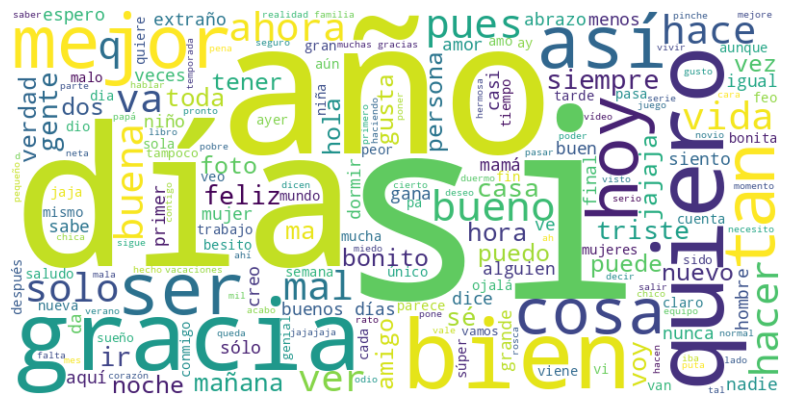

In [136]:
# Generar nube de palabras para cada conjunto
texto_completo = " ".join(data['Contents'])
generar_nube_palabras(texto_completo)

In [137]:
# NO biased nube de palabras
no_biased = data[data['Label'] == 'non-biased']

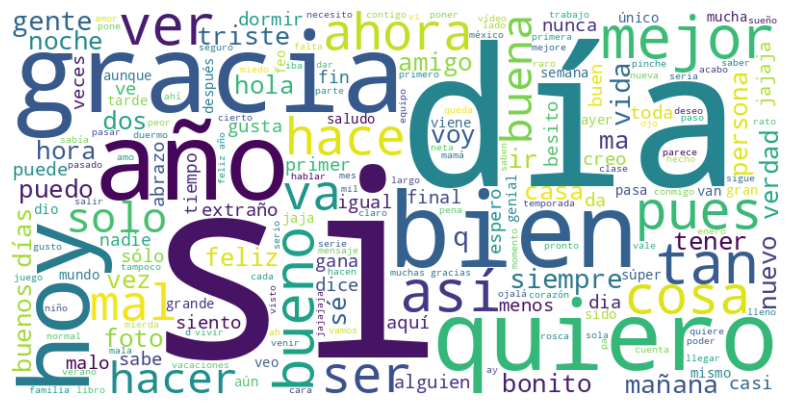

In [139]:
texto_completo = " ".join(no_biased['Contents'])
generar_nube_palabras(texto_completo)

In [140]:
biased = data[data['Label'] == 'biased']

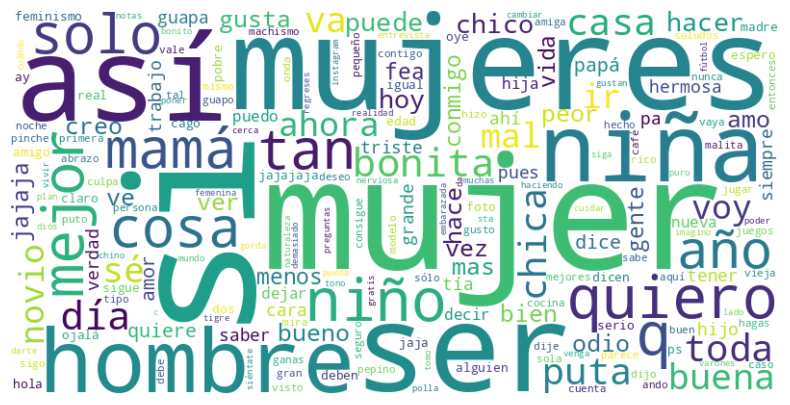

In [141]:
texto_completo = " ".join(biased['Contents'])
generar_nube_palabras(texto_completo)

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?